# ICNN Fitting

Here is the mathematical definition of an ICNN used in the [Makkuva et al] paper implementation.

$$
\begin{align}
    z_{i+1} & = \sigma ( A_{i} z_0 + W_{i} z_i + b_i ) \qquad i = 0, 1, \ldots, D-1\\
    f_{\theta}(z_0) & = z_D
\end{align}
$$

where the layer widths are controlled by integers $\{k_i\}_{i=0}^{D}$ and the parameters are $A_i \in \mathbb{R}^{k_{i+1} \times k_i}$, $b_i \in \mathbb{R}^{k_{i+1}}$, and $W_i \in \mathbb{R}^{k_{i+1} \times k_i}_+$. Note that the matrices $A_i$ are unconstrained linear functions of the input $z_0$.

**Notation**: some ICNNs in this page are written as "$(k_0, k_1, \ldots, k_d)$ ICNN" to denote layer input/output sizes. For example, a $(1, 3, 1)$ ICNN has two layers, the first mapping from 1 to 3 dimensions and the second mapping from 3 to 1 dimension.

**What are these plots**: 
Each figure shows the result of fitting an ICNN to a given function. The fitting method is least squares minimization,

$$
\min_{\theta} \|y(x) - \texttt{ICNN}_\theta(x)\|_2^2 \qquad \theta = \bigcup_{i=1}^{D-1} \{A_i, W_i, b_i\}.
$$

The objective is optimized through gradient descent (Adam) where each $W_i$ is clamped to $[0, \infty)$ after every descent step.

**Takeaways**:<br/>
_Section 1_ -  Each layer receives as input an *unconstrained* linear function $A_i z_0$ of the input. This is where negativity comes into play.<br/>
_Section 2_ -  Overparametrization matters - gradient descent can converge to bad solutions if the net is not sufficiently overparametrized.<br/>
_Section 3_ - When fitting nonconvex functions, the net doesn't necessarily learn an cvx-hull-of-epigraph convexification. In this problem, it 'averages' over the nonconvex part which is reasonable under a least squares objective.

In [8]:
print("Code cell...")
import torch
import torch.nn as nn
import numpy as np
import json
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from icnn.nets import ICNN, MLP, TParams

Code cell...


SyntaxError: invalid syntax (nets.py, line 85)

# 1. Fitting $y=-x$

The simplest way to fit $y=-x$ is to use a one layer ICNN with identity activation and to set $A_0 = -1$, $W_0 = 0$, $b_0 = 0$.

100%|██████████| 10000/10000 [00:08<00:00, 1194.37it/s]


[]

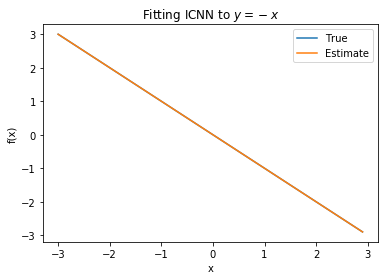

In [5]:
i = ICNN("linear", (1, 1))
t = TParams(0.001, 0.9, 0.9, 10000)
i.train(lambda x: -x, -3, 3, 0.1, t)
i.plot(lambda x: -x, -3, 3, 0.1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Fitting ICNN to $y=-x$")
plt.gca().legend()
plt.plot()

# 2. Fitting y = x^2

When the ICNN is "critically parametrized," having enough parameters to represent a function but not much more, gradient descent can find bad local minima. 

For example, the following can happen when fitting a $(1, 3, 1)$ ICNN to $y=x^2$:
1. The ICNN closely approximates $y=x^2$
2. The ICNN outputs 0 for $x<0$ and closely approximates $y=x^2$ for $x\geq 0$, or vice versa
3. The ICNN outputs 0 for all $x$

**Underparametrized** - $(1, 3, 1)$ ICNN

Run 1 (fixed seed)

100%|██████████| 10000/10000 [00:12<00:00, 785.97it/s]


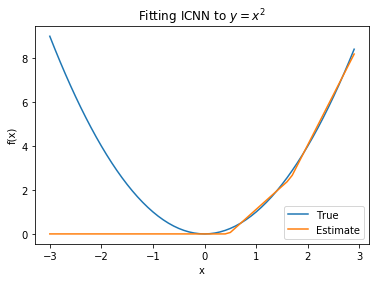

In [7]:
torch.manual_seed(0)
np.random.seed(0)

i = ICNN("relu", (1, 3, 1))
t = TParams(0.001, 0.9, 0.9, 10000)
i.train(lambda x: x**2, -3, 3, 0.1, t)

i.plot(lambda x: x**2, -3, 3, 0.1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Fitting ICNN to $y=x^2$")
plt.gca().legend()
plt.show()

Run 2 (fixed seed)

100%|██████████| 10000/10000 [00:12<00:00, 788.08it/s]


[]

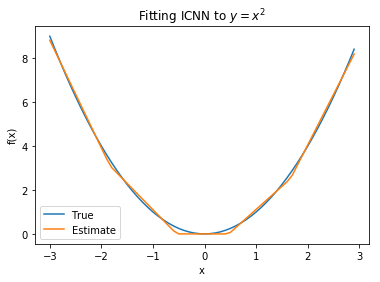

In [8]:
torch.manual_seed(1)
np.random.seed(1)

i = ICNN("relu", (1, 3, 1))
t = TParams(0.001, 0.9, 0.9, 10000)
i.train(lambda x: x**2, -3, 3, 0.1, t)

i.plot(lambda x: x**2, -3, 3, 0.1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Fitting ICNN to $y=x^2$")
plt.gca().legend()
plt.plot()

Run 3 (fixed seed)

100%|██████████| 10000/10000 [00:12<00:00, 795.16it/s]


[]

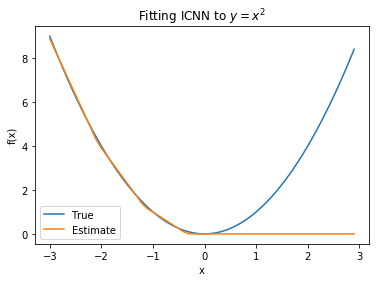

In [9]:
torch.manual_seed(5)
np.random.seed(5)

i = ICNN("relu", (1, 3, 1))
t = TParams(0.001, 0.9, 0.9, 10000)
i.train(lambda x: x**2, -3, 3, 0.1, t)

i.plot(lambda x: x**2, -3, 3, 0.1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Fitting ICNN to $y=x^2$")
plt.gca().legend()
plt.plot()

Run 4 (fixed seed)

100%|██████████| 10000/10000 [00:12<00:00, 789.66it/s]


[]

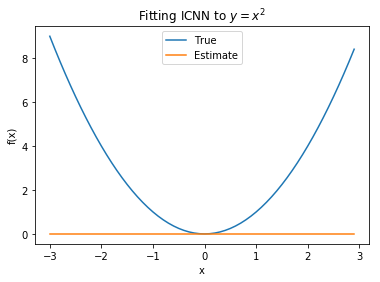

In [10]:
s = 14
torch.manual_seed(s)
np.random.seed(s)

i = ICNN("relu", (1, 3, 1))
t = TParams(0.001, 0.9, 0.9, 10000)
i.train(lambda x: x**2, -3, 3, 0.1, t)

i.plot(lambda x: x**2, -3, 3, 0.1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Fitting ICNN to $y=x^2$")
plt.gca().legend()
plt.plot()

**Overparametrized** - $(1, 100, 1)$ ICNN

100%|██████████| 10000/10000 [00:14<00:00, 712.91it/s]


[]

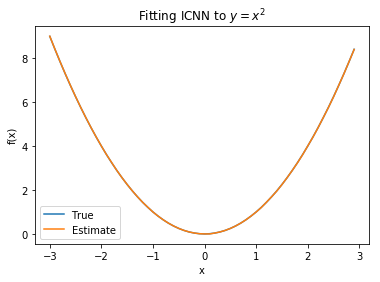

In [11]:
torch.manual_seed(1)
np.random.seed(1)

i = ICNN("relu", (1, 100, 1))
t = TParams(0.001, 0.9, 0.9, 10000)
i.train(lambda x: x**2, -3, 3, 0.1, t)

i.plot(lambda x: x**2, -3, 3, 0.1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Fitting ICNN to $y=x^2$")
plt.gca().legend()
plt.plot()

# 3. Fitting a nonconvex function, $y=x^2 + e^{-5x^2}$

100%|██████████| 10000/10000 [00:13<00:00, 752.01it/s]


[]

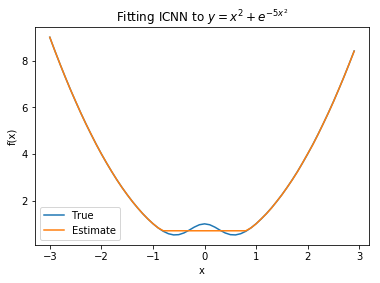

In [12]:
torch.manual_seed(1)
np.random.seed(1)

i = ICNN("relu", (1, 100, 1))
t = TParams(0.001, 0.9, 0.9, 10000)
i.train(lambda x: x**2 + np.exp(-5*x**2), -3, 3, 0.1, t)

i.plot(lambda x: x**2 + np.exp(-5*x**2), -3, 3, 0.1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Fitting ICNN to $y=x^2 + e^{-5x^2}$")
plt.gca().legend()
plt.plot()

# 4. Fitting $y=x^2 + \sin(100x)$ 

100%|██████████| 10000/10000 [00:14<00:00, 710.86it/s]


[]

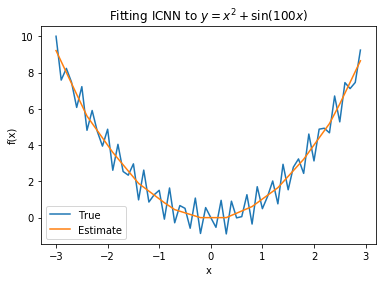

In [16]:
torch.manual_seed(1)
np.random.seed(1)

i = ICNN("relu", (1, 100, 1))
t = TParams(0.001, 0.9, 0.9, 10000)
i.train(lambda x: x**2 + np.sin(100*x), -3, 3, 0.1, t)

i.plot(lambda x: x**2 + np.sin(100*x), -3, 3, 0.1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Fitting ICNN to $y=x^2 + \sin(100x)$")
plt.gca().legend()
plt.plot()